In [ ]:
!cd segment_anything

In [1]:
!/bin/python3 -m pip install ipykernel -U --user --force-reinstall

  Using cached ipykernel-6.22.0-py3-none-any.whl (149 kB)
  Using cached tornado-6.3.1-cp38-abi3-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (426 kB)
  Using cached psutil-5.9.5-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (282 kB)
  Using cached pyzmq-25.0.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Using cached comm-0.1.3-py3-none-any.whl (6.6 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Using cached traitlets-5.9.0-py3-none-any.whl (117 kB)
  Using cached ipython-8.12.1-py3-none-any.whl (797 kB)
  Using cached debugpy-1.6.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached jupyter_client-8.2.0-py3-none-any.whl (103 kB)
  Using cached jupyter_core-5.3.0-py3-none-any.whl (93 kB)
  Using cached matplotlib_inline-0.1.6-py3-none-any.whl (9.4 kB)
  Using cached nest_asyncio-1.5.6-py3-none-any.whl (5.2 kB)
     |██████████

In [1]:
!pip install -e .

Obtaining file:///home/paperspace/GitHub/segment-anything
  Attempting uninstall: segment-anything
    Found existing installation: segment-anything 1.0
    Can't uninstall 'segment-anything'. No files were found to uninstall.
  Running setup.py develop for segment-anything
Note: you may need to restart the kernel to use updated packages.


In [3]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth


--2023-04-24 13:39:55--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.34.7, 13.226.34.122, 13.226.34.53, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.34.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1249524607 (1.2G) [binary/octet-stream]
Saving to: ‘sam_vit_l_0b3195.pth’

sam_vit_l_0b3195.pt 100%[===================>]   1.16G   264MB/s    in 4.6s    

2023-04-24 13:40:00 (261 MB/s) - ‘sam_vit_l_0b3195.pth’ saved [1249524607/1249524607]

--2023-04-24 13:40:00--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.34.7, 13.226.34.53, 13.226.34.83, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.34.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b

In [2]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-04-24 13:37:54--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.165.83.44, 18.165.83.91, 18.165.83.35, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.165.83.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   227MB/s    in 9.3s    

2023-04-24 13:38:04 (262 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [ ]:
!rm -r 

In [7]:
!unzip ESCA_dataset.zip -d ESCA_dataset

Archive:  ESCA_dataset.zip
   creating: ESCA_dataset/ESCA_dataset/
  inflating: ESCA_dataset/__MACOSX/._ESCA_dataset  
  inflating: ESCA_dataset/ESCA_dataset/.DS_Store  
  inflating: ESCA_dataset/__MACOSX/ESCA_dataset/._.DS_Store  
   creating: ESCA_dataset/ESCA_dataset/healthy/
   creating: ESCA_dataset/ESCA_dataset/esca/
  inflating: ESCA_dataset/ESCA_dataset/healthy/.DS_Store  
  inflating: ESCA_dataset/__MACOSX/ESCA_dataset/healthy/._.DS_Store  
   creating: ESCA_dataset/ESCA_dataset/healthy/pictures/
  inflating: ESCA_dataset/ESCA_dataset/healthy/healthy_1920x1920.jpg  
  inflating: ESCA_dataset/__MACOSX/ESCA_dataset/healthy/._healthy_1920x1920.jpg  
   creating: ESCA_dataset/ESCA_dataset/healthy/healthy_foliage_over_esca_bg/
  inflating: ESCA_dataset/__MACOSX/ESCA_dataset/healthy/._healthy_foliage_over_esca_bg  
   creating: ESCA_dataset/ESCA_dataset/healthy/masks/
  inflating: ESCA_dataset/ESCA_dataset/esca/.DS_Store  
  inflating: ESCA_dataset/__MACOSX/ESCA_dataset/esca/._.DS_S

In [5]:
import os

prms = {
    'checkpoint': 'sam_vit_h_4b8939.pth',
    'model-type': 'vit_h',
    'input': os.path.join(*['pictures']),
    'output': os.path.join(*['SAM_masks'])
}
!python3 scripts/amg.py --checkpoint {prms['checkpoint']} --model-type {prms['model-type']} --input prms['input'] --output {prms['output']}

Traceback (most recent call last):
  File "scripts/amg.py", line 7, in <module>
    import cv2  # type: ignore
ModuleNotFoundError: No module named 'cv2'


In [6]:
from segment_anything import SamPredictor, sam_model_registry

sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
img_file = os.path.join(*['pictures', 'esca_000_cam1.jpg'])
masks = mask_generator.generate(img_file)


FileNotFoundError: [Errno 2] No such file or directory: 'sam_vit_h_4b8939.pth'

In [1]:
import sys
sys.path.append("..")

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "CPU"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

ModuleNotFoundError: No module named 'torch'

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

img_file = os.path.join(*['pictures', 'esca_000_cam1.jpg'])
image = plt.imread(img_file)
masks = mask_generator.generate(image)


ModuleNotFoundError: No module named 'matplotlib'

In [9]:
print(len(masks))
print(masks[0].keys())

126
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [11]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

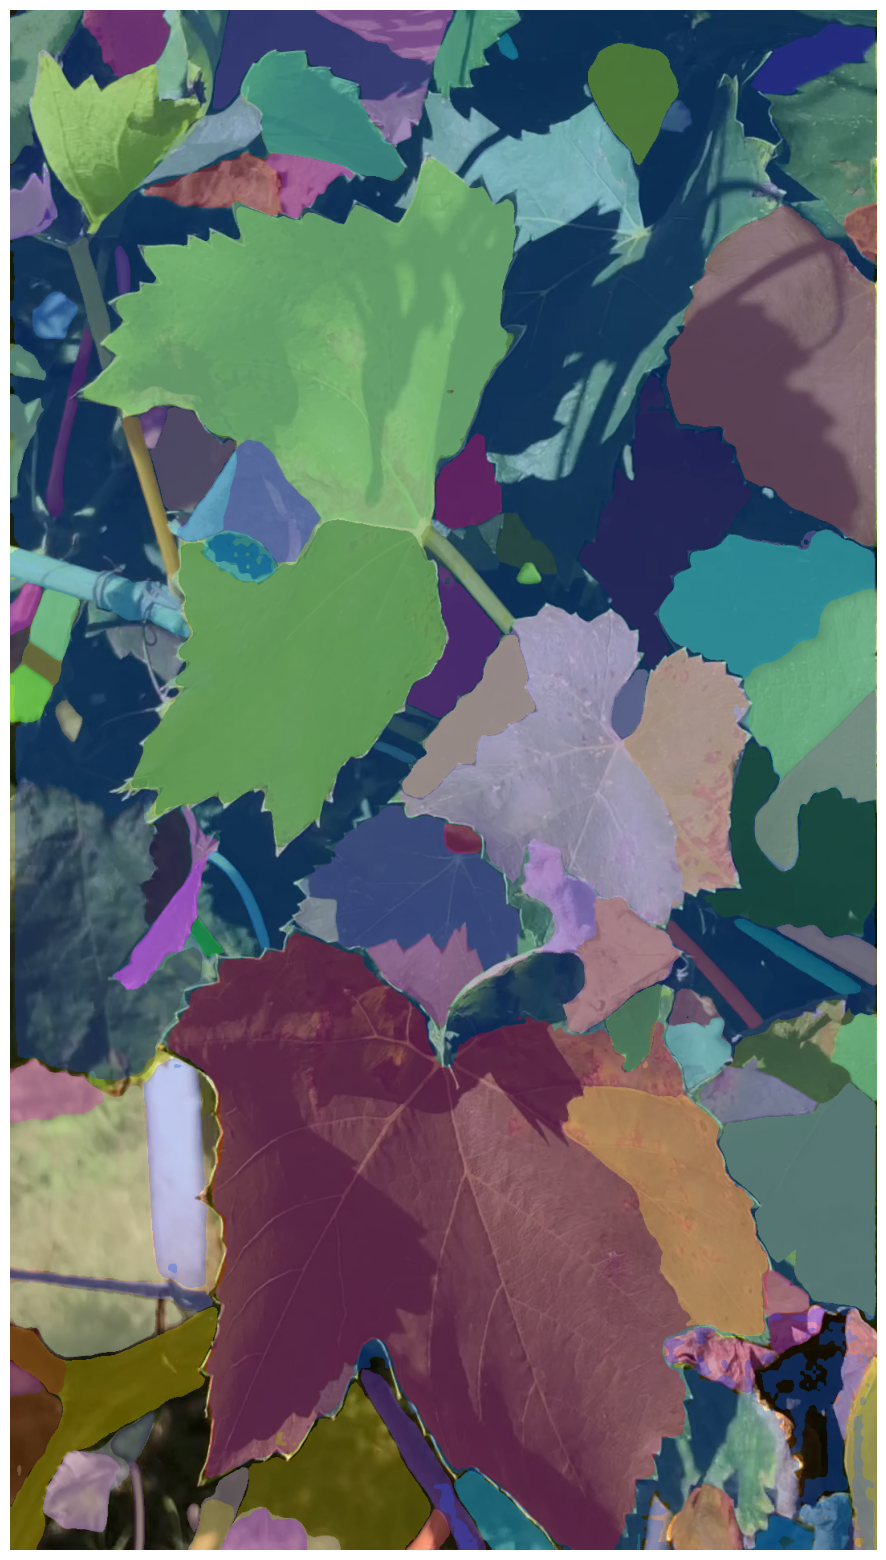

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()